# Load Files

In [ ]:
! pip install requests
! pip install requests-oauthlib
! pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! rm -r ~/.kaggle
! mkdir ~/.kaggle
! mv ./kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
! kaggle datasets download -d kognitron/zielaks-bitcoin-historical-data-wo-nan
! kaggle datasets download -d mczielinski/bitcoin-historical-data
! kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

 91% 89.0M/97.8M [00:02<00:00, 40.7MB/s]
100% 97.8M/97.8M [00:02<00:00, 39.1MB/s]
 89% 89.0M/100M [00:03<00:00, 31.3MB/s]
100% 100M/100M [00:03<00:00, 26.5MB/s] 
  0% 0.00/1.70M [00:00<?, ?B/s]
100% 1.70M/1.70M [00:00<00:00, 98.3MB/s]


In [ ]:
! ls

bitcoin-historical-data.zip	sample_data
cryptocurrencypricehistory.zip	zielaks-bitcoin-historical-data-wo-nan.zip


In [ ]:
! unzip bitcoin-historical-data.zip
! unzip zielaks-bitcoin-historical-data-wo-nan.zip
! unzip cryptocurrencypricehistory.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  
Archive:  zielaks-bitcoin-historical-data-wo-nan.zip
  inflating: bitstamp_cleaned.csv    
Archive:  cryptocurrencypricehistory.zip
  inflating: coin_Aave.csv           
  inflating: coin_BinanceCoin.csv    
  inflating: coin_Bitcoin.csv        
  inflating: coin_Cardano.csv        
  inflating: coin_ChainLink.csv      
  inflating: coin_Cosmos.csv         
  inflating: coin_CryptocomCoin.csv  
  inflating: coin_Dogecoin.csv       
  inflating: coin_EOS.csv            
  inflating: coin_Ethereum.csv       
  inflating: coin_Iota.csv           
  inflating: coin_Litecoin.csv       
  inflating: coin_Monero.csv         
  inflating: coin_NEM.csv            
  inflating: coin_Polkadot.csv       
  inflating: coin_Solana.csv         
  inflating: coin_Stellar.csv        
  inflating: coin_Tether.csv         
  inflating: coin_Tron.csv           
  inflating: coin_USDCoin.csv        
  i

In [ ]:
! ls

bitcoin-historical-data.zip
bitstamp_cleaned.csv
bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
coin_Aave.csv
coin_BinanceCoin.csv
coin_Bitcoin.csv
coin_Cardano.csv
coin_ChainLink.csv
coin_Cosmos.csv
coin_CryptocomCoin.csv
coin_Dogecoin.csv
coin_EOS.csv
coin_Ethereum.csv
coin_Iota.csv
coin_Litecoin.csv
coin_Monero.csv
coin_NEM.csv
coin_Polkadot.csv
coin_Solana.csv
coin_Stellar.csv
coin_Tether.csv
coin_Tron.csv
coin_Uniswap.csv
coin_USDCoin.csv
coin_WrappedBitcoin.csv
coin_XRP.csv
cryptocurrencypricehistory.zip
sample_data
zielaks-bitcoin-historical-data-wo-nan.zip


# Imports

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

In [ ]:
# read cleaned bitcoin data
cleaned_df = pd.read_csv('bitstamp_cleaned.csv')

In [ ]:
# read raw bitcoin data
raw_df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [ ]:
# more recent bitcoin data
btc_df = pd.read_csv('coin_Bitcoin.csv')

In [ ]:
cleaned_df.shape

(3330541, 9)

In [ ]:
btc_df.shape

(2991, 10)

In [ ]:
cleaned_df.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,12/31/2011 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,12/31/2011 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,12/31/2011 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,12/31/2011 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,01/01/2012 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
btc_df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


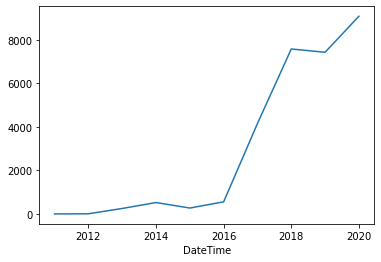

In [ ]:
cleaned_df['DateTime'] = pd.to_datetime(cleaned_df['DateTime'], infer_datetime_format=True)
cleaned_df.groupby(cleaned_df['DateTime'].dt.year)['Close'].mean().plot()

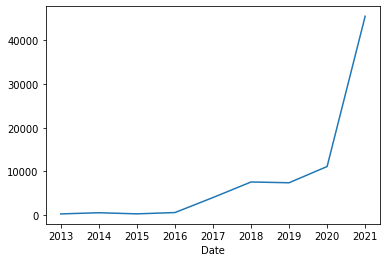

In [ ]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'], infer_datetime_format=True)
btc_df.groupby(btc_df['Date'].dt.year)['Close'].mean().plot()

In [ ]:
filtered = cleaned_df[cleaned_df.DateTime >= '01-01-2020']
filtered['Date'] = pd.to_datetime(filtered['DateTime'])
filtered.head()

,Unix_Timestamp,DateTime,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
2966849,1577836800,2020-01-01 00:00:00,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520,2020-01-01 00:00:00
2966850,1577836860,2020-01-01 00:01:00,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209,2020-01-01 00:01:00
2966851,1577836920,2020-01-01 00:02:00,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000,2020-01-01 00:02:00
2966852,1577836980,2020-01-01 00:03:00,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885,2020-01-01 00:03:00
2966853,1577837040,2020-01-01 00:04:00,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666,2020-01-01 00:04:00


In [ ]:
filtered = filtered.groupby(pd.Grouper(key='Date', freq='d')).agg({"Open": "first", 
                                                          "Close": "last", 
                                                          "High": "min", 
                                                          "Low": "max",
                                                          "Volume_(BTC)": "sum",
                                                          "Volume_(Currency)": "sum"})

filtered.reset_index(inplace=True)
filtered.head()

,Date,Open,Close,High,Low,Volume_(BTC),Volume_(Currency)
0,2020-01-01,7160.69,7178.68,7150.10,7228.00,1119.109693,8.052271e+06
1,2020-01-02,7174.70,6950.56,6923.43,7184.86,3972.707954,2.792898e+07
2,2020-01-03,6945.70,7338.91,6865.09,7385.70,8072.729087,5.836733e+07
3,2020-01-04,7332.58,7344.48,7280.00,7382.55,3256.737353,2.382544e+07
4,2020-01-05,7356.05,7356.70,7319.20,7484.36,2707.273855,2.010846e+07


In [ ]:
filtered.shape

(258, 7)

In [ ]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

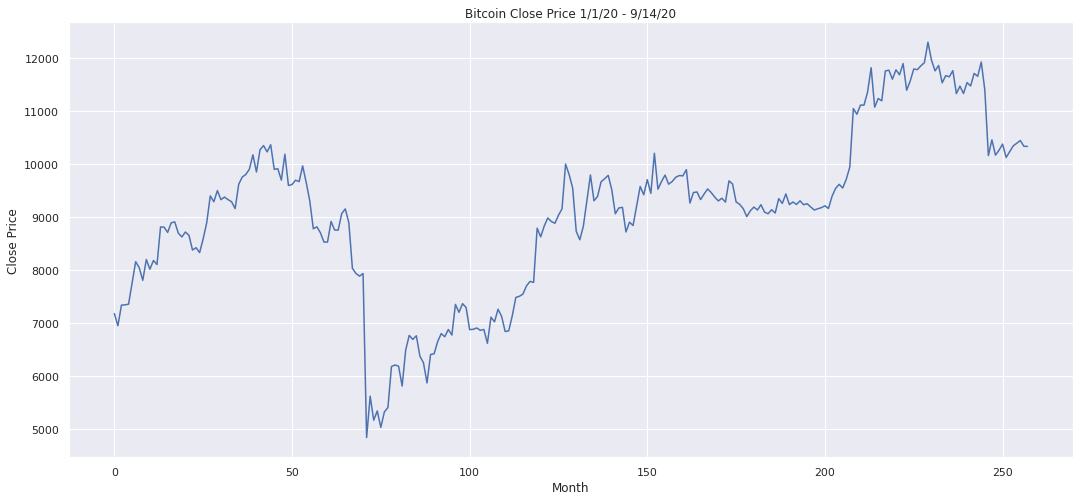

In [ ]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(18, 8))
plt.plot( filtered['Close'])

plt.xlabel("Month")
plt.ylabel("Close Price")
plt.title("Bitcoin Close Price 1/1/20 - 9/14/20")

plt.show()


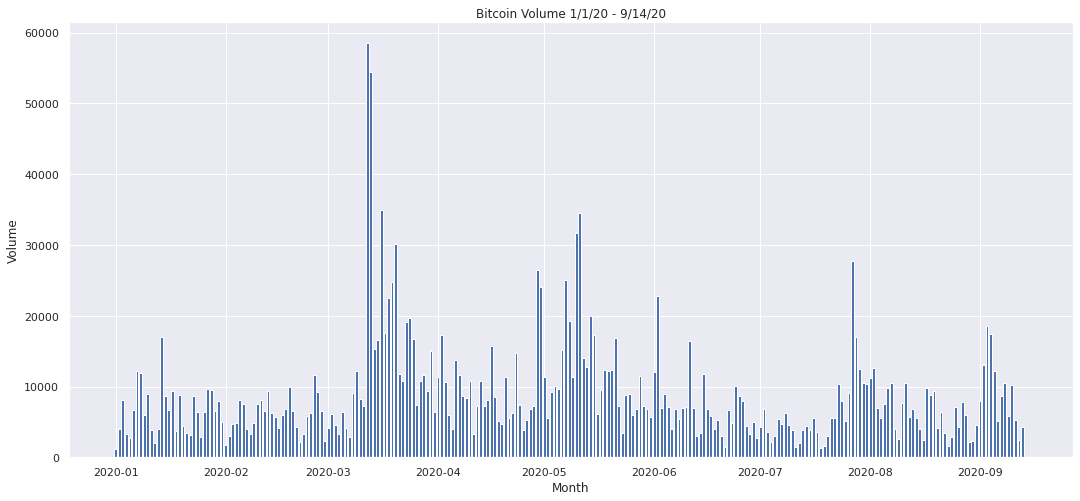

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(filtered['Date'], filtered['Volume_(BTC)'])

plt.xlabel("Month")
plt.ylabel("Volume")
plt.title("Bitcoin Volume 1/1/20 - 9/14/20")

plt.show()

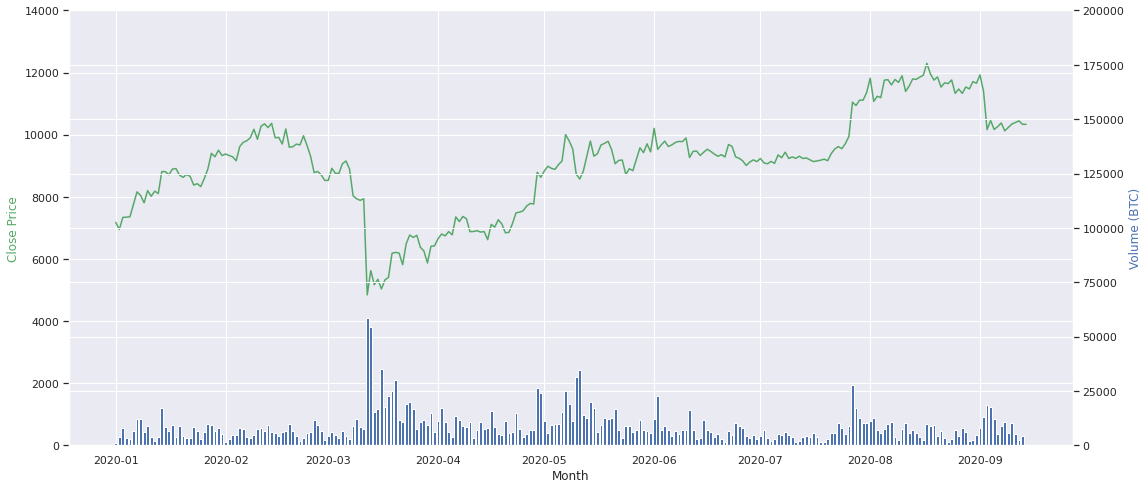

In [ ]:
# plt.figure(figsize=(18, 8))
fig, ax1 = plt.subplots(figsize=(18, 8))
ax2 = ax1.twinx()

ax1.plot(filtered['Date'], filtered['Close'], 'g-')
ax2.bar(filtered['Date'], filtered['Volume_(BTC)'])

ax1.set_ylim(0,14000)
ax2.set_ylim(0,200000)

ax1.set_xlabel('Month')
ax1.set_ylabel('Close Price', color='g')
ax2.set_ylabel('Volume (BTC)', color='b')

plt.show()

In [ ]:
! pip install plotly
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.7 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=go.Scatter(x = filtered['Date'], y = filtered['Close'], mode='lines'))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=filtered['Date'],
                open=filtered['Open'],
                high=filtered['High'],
                low=filtered['Low'],
                close=filtered['Close'])])

fig.show()

In [ ]:
btc_df_2019 = btc_df[btc_df.Date >= '01-01-2019']

fig = go.Figure(data=[go.Candlestick(x=btc_df_2019['Date'],
                open=btc_df_2019['Open'],
                high=btc_df_2019['High'],
                low=btc_df_2019['Low'],
                close=btc_df_2019['Close'])])

fig.show()

In [ ]:
# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.1, subplot_titles=('Time Series', 'Volume'), 
               row_width=[0.2, 0.7])

# Plot Time Series on 1st row
#fig.add_trace(go.Line(x=btc_df_2019["Date"], y=btc_df_2019["Close"]), row=1, col=1)
fig.add_trace(go.Candlestick(x=btc_df_2019['Date'],
                open=btc_df_2019['Open'],
                high=btc_df_2019['High'],
                low=btc_df_2019['Low'],
                close=btc_df_2019['Close'],
                showlegend=False), row=1, col=1)

# Bar trace for volumes on 2nd row without legend
fig.add_trace(go.Bar(x=btc_df_2019['Date'], 
                     y=btc_df_2019['Volume'], 
                     showlegend=False), row=2, col=1)

# Do not show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=False)

fig.show()